# **K-pop Phenomenon On YouTube:**
## US YouTube Trending Videos Data Analysis and Storytelling

---
**K-pop**, which stands for *popular music originating in South Korea*, has no doubt become a global phenomenon featuring idol groups and fandom culture.


In the past few years, big K-pop entertainment companies have made lots of attempts to break into the US market. Have they succeeded? How does K-pop perform on YouTube in the US?


This report will examine K-pop videos’ performance on the YouTube Trending Page. The focus will be on K-pop-related descriptive, correlational and distributive analysis. 


---

## **1 Raising Questions**

- **Are K-pop videos the all-rouder top-ranker?**

    - Which videos rank top according to ***the number of views, likes, comments*** and ***times of appearance*** on the trending page?
    - What are the ***correlations*** between these rankings?

- **Are K-pop related channels also popular in the U.S. region?** 

    - Which channels have a large number of trending videos?
    - Select a K-pop channel to analyze the time it takes for its videos to be posted to the Youtube trending.


- **Are K-pop released dates and popularity related to the months?**

    - which month has most videos in ***All Category***  Channel, in ***Only Music***  Channel, and in ***A certain K-pop Group***  Channel?
    - Does every video in one month of the group be ***popular as others***? How to ***measure the popularity*** of a video?

## **2 Preparing Data**

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

<div class="alert alert-block alert-info">
⏰
<b>Notice:</b> The cleaned dataset is 90MB large, so it may take minutes to load. 
</div>

In [2]:
# Read the cleaned dataset

df_us = pd.read_csv('https://github.com/zhouhe018/damg6105/releases/download/cleaned_data/US_youtube_trending_data.csv', index_col=[0])
df_us.head()

,video_id,video_title,publish_on,channel_id,channel_title,trend_on,tags,view_count,likes,dislikes,comment_count,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,Howto & Style


In [3]:
# Generate descriptive statistics

pd.set_option('display.float_format', lambda x : '%.2f' % x)
df_us.describe()

,view_count,likes,dislikes,comment_count
count,66956.00,66956.00,66956.00,66956.00
mean,2853531.29,153926.29,3368.60,15492.53
std,6612078.93,419486.59,14455.06,109155.64
min,38510.00,0.00,0.00,0.00
25%,567141.00,22017.00,399.00,1937.00
50%,1168835.50,54491.50,924.00,4377.00
75%,2612976.25,137667.00,2454.00,10394.00
max,264407389.00,16021534.00,879354.00,6738537.00


## **3 Analyzing and Exploring**

### **3.1 Are K-pop videos the all-rouder top-ranker?**

(1) Top 5 **Most-viewed** Trending Videos

In [4]:
# Define the function to highlight the K-pop video title in the ranking table

def highlight_kpop(v):
    ls_kpop = ['BTS','BLACKPINK','LISA','ROSÉ','EXO']
    color = ''
    for str in ls_kpop:
        if str in v:
            color = '#B0E0E6'
    return f"background-color: {color};" 

In [5]:
# Sort by "view_count" in descending order
df_viewed = df_us[['video_id','video_title','channel_title','view_count']].sort_values(by= 'view_count', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_viewed_show = df_viewed.head()
df_viewed_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,view_count
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,264407389
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,232649205
2,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248
3,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,150622781
4,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,140685439


(2) Top 5 **Most-liked** Trending Videos

In [6]:
# Sort by "likes" in descending order
df_liked = df_us[['video_id','video_title','channel_title','likes']].sort_values(by= 'likes', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_liked_show = df_liked.head()
df_liked_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,likes
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,16021534
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,15735533
2,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,11795670
3,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,11405030
4,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,9217876


(3) Top 5 **Most-commented** Trending Videos

In [7]:
# Sort by "comment_count" in descending order
df_commented = df_us[['video_id','video_title','channel_title','comment_count']].sort_values(by= 'comment_count', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_commented_show = df_commented.head()
df_commented_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,comment_count
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,6738537
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,6065230
2,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,4160903
3,GAME (Full Video) Shooter Kahlon | Sidhu Moose Wala | Hunny PK Films | Gold Media | 5911 Records,5911 Records,3431431
4,EXO 엑소 'Don't fight the feeling' MV,SMTOWN,2857602


(4) Top 5 **Most-frequently-trending** Trending Videos

In [8]:
# Count the number of time that the video appearred on the trending page
trending_times = df_us['video_id'].value_counts()

# Sort by "trending_time" in descending order
df_trended = trending_times.rename_axis('video_id').reset_index(name='trending_times')
df_trended = pd.merge(df_viewed, df_trended, how = 'left',on = ['video_id']).drop(columns = 'view_count').sort_values(by= 'trending_times', ascending= False).reset_index(drop = True)

# Show Top5
df_trended_show = df_trended.head()
df_trended_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,trending_times
0,"Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ",CBS Sports HQ,35
1,Israeli Iron Dome filmed intercepting rockets from Gaza,The Telegraph,34
2,"India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21",cricket.com.au,34
3,Justin Bieber - Holy ft. Chance The Rapper,JustinBieberVEVO,27
4,Golden Buzzer: Nightbirde's Original Song Makes Simon Cowell Emotional - America's Got Talent 2021,America's Got Talent,24


From the rankings above, we could clearly see that:
- K-pop trending videos **truly top** the rankings of **views, likes, and comments**. For example, "Butter", "Dynamite" and "Life Goes On" from BTS are all on the top 5 lists.  
- However, the ranking of **trending times(frequency)** is very different from the other three. There appears to be none K-pop videos on the top 5 list.

Here comes the question:  
**Why is the frequency ranking so different from other rankings?**  
What are the **correlations** between them?

In [9]:
# Generate a dataframe in the format for correlation analysis

def merge_all(df_list, column_list):
    df_merge = df_list[0]
    for i in range(1, len(df_list)):
        df_merge = pd.merge(df_merge, df_list[i], how = 'left', on = column_list)
    return df_merge 

df_list = [df_viewed, df_liked, df_commented, df_trended]
column_list = ['video_id', 'video_title', 'channel_title']

df_merge = merge_all(df_list, column_list)
df_corr = df_merge[['view_count', 'likes', 'comment_count', 'trending_times']]

Text(0.5, 1.0, 'Correlation Heatmap')

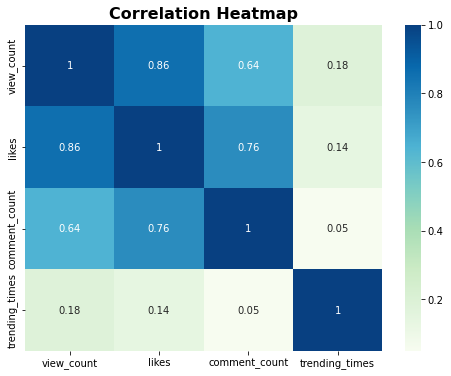

In [10]:
# Calculate and display the correlation matrix
corr = np.corrcoef(df_corr)

f, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(df_corr.corr(), annot= True, cmap = 'GnBu')
ax.set_title('Correlation Heatmap', fontsize = 16, fontweight = 'bold')

From the correlation heatmap, we could clearly see that:
- The number of views, likes and comments are **strongly correlated** to each other.
- The number of trending times shows **very weak correlations** to other three indicators.

Thus, it makes sense that the trending time ranking is totally different from other three rankings.

### **3.2 Are kpop related channels also popular in the US area?**

(1）Which channels have a large number of trending videos?

In [11]:
total_chanel = df_us.groupby("channel_title")["video_id"].count().sort_values(ascending=False).head(20).reset_index()
total_chanel.rename(columns={"channel_title":"Channel_title","video_id":"Total_videos"},inplace=True)
total_chanel.style.background_gradient(cmap='mako_r')

,Channel_title,Total_videos
0,NBA,492
1,NFL,410
2,MrBeast Gaming,310
3,SSSniperWolf,301
4,ESPN,272
5,MrBeast,268
6,Saturday Night Live,247
7,Dude Perfect,227
8,Champions League on CBS Sports,215
9,SpaceX,209


SMTOWN is the only one about K-pop in the top 20 channels.

In [12]:
data = df_us[df_us['channel_title'].str.contains('BLACKPINK')].copy()
data['SpentOnTrending'] = pd.to_datetime(data.trend_on) - pd.to_datetime(data.publish_on)
print(data['SpentOnTrending'])

2404    0 days
2621    1 days
2847    2 days
3004    0 days
3090    3 days
         ...  
66025   1 days
66245   2 days
66471   3 days
66696   4 days
66927   5 days
Name: SpentOnTrending, Length: 158, dtype: timedelta64[ns]


In [13]:
data['SpentOnTrending'] = data.SpentOnTrending.dt.days
data_days = data[['video_id','video_title','channel_title','view_count','SpentOnTrending']].sort_values(by= 'SpentOnTrending', ascending= True).drop_duplicates(subset = 'video_id').reset_index(drop = True)
data_days

,video_id,video_title,channel_title,view_count,SpentOnTrending
0,dGCSeyKL5dE,BLACKPINK X Selena Gomez - 'Ice Cream' Teaser ...,BLACKPINK,5159143,0
1,lrAHSIz6ugM,BLACKPINK - ‘THE SHOW’ GUIDE VIDEO,BLACKPINK,1938948,0
2,Tj97V46-Irs,BLACKPINK - 'THE SHOW' MESSAGE VIDEO,BLACKPINK,1906759,0
3,VgVzTgjKZ7k,BLACKPINK - THE INVITATION,BLACKPINK,2170066,0
4,Z3kAZse4xgM,BLACKPINK - AROUND THE WORLD,BLACKPINK,3374134,0
5,bO8hS_W3BPE,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/...,BLACKPINK,7759237,0
6,CyqctquwO3Y,BLACKPINK - ‘THE SHOW’ POSTPONEMENT ANNOUNCEMENT,BLACKPINK,1509061,0
7,CKZvWhCqx1s,ROSÉ - 'On The Ground' M/V,BLACKPINK,25278696,0
8,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,51234434,0
9,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,39363127,0


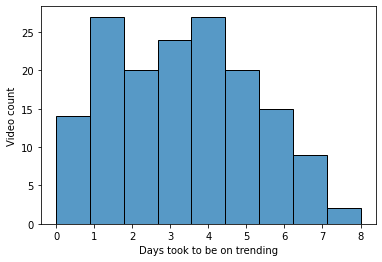

In [14]:
sns.histplot(data=data.SpentOnTrending)
plt.ylabel("Video count")
plt.xlabel("Days took to be on trending")
plt.show()

It takes less than five days for most of BLACKPINK's videos to become trending on the YouTube.

### **3.3 Are K-pop released dates and popularity related to the months?**

(1)the ***most popular month*** for uploaders in ***All Category***  Channel

In [15]:
df_month_analyse = df_us

#get the year and month
df_month_analyse.publish_on= pd.to_datetime(df_month_analyse.publish_on)
df_month_analyse.trend_on= pd.to_datetime(df_month_analyse.trend_on)
df_month_analyse['Year']=df_month_analyse['publish_on'].dt.year
df_month_analyse['Month']=df_month_analyse.publish_on.dt.month

In [16]:
#get and the statistics of the first half of 2021
df_month_analyse_1 = df_month_analyse[df_month_analyse["Year"] == 2021]
df_month_analyse_half_year = df_month_analyse_1[df_month_analyse_1["Month"] < 7]

<AxesSubplot:xlabel='Month', ylabel='Amount'>

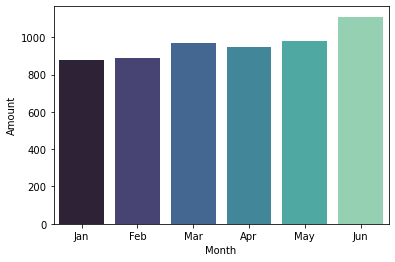

In [17]:
df_month_all_category = df_month_analyse_half_year[['video_id','video_title','view_count','likes','comment_count','channel_title','category','Year','Month']].sort_values(by= 'Month', ascending= True).drop_duplicates(subset = 'video_id').reset_index(drop = True)
df_jan = df_month_all_category[df_month_all_category["Month"] == 1]
df_feb = df_month_all_category[df_month_all_category["Month"] == 2]
df_mar = df_month_all_category[df_month_all_category["Month"] == 3]
df_apr = df_month_all_category[df_month_all_category["Month"] == 4]
df_may = df_month_all_category[df_month_all_category["Month"] == 5]
df_jun = df_month_all_category[df_month_all_category["Month"] == 6]
data_all_category = {"Month":["Jan","Feb","Mar","Apr","May","Jun"], "Amount":[len(df_jan), len(df_feb), len(df_mar), len(df_apr), len(df_may), len(df_jun)]}
df_all_category = DataFrame(data_all_category)

sns.barplot(data = df_all_category, x = "Month", y = "Amount", label="Total", palette='mako')

(2)the ***most popular month*** for uploaders in ***Only Music Channel***

<AxesSubplot:xlabel='Month', ylabel='Amount'>

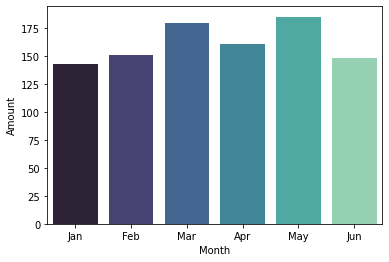

In [18]:
df_jan_2 = df_jan[df_jan["category"] == "Music"]
df_feb_2 = df_feb[df_feb["category"] == "Music"]
df_mar_2 = df_mar[df_mar["category"] == "Music"]
df_apr_2 = df_apr[df_apr["category"] == "Music"]
df_may_2 = df_may[df_may["category"] == "Music"]
df_jun_2 = df_jun[df_jun["category"] == "Music"]
data_music_category = {"Month":["Jan","Feb","Mar","Apr","May","Jun"], "Amount":[len(df_jan_2), len(df_feb_2), len(df_mar_2), len(df_apr_2), len(df_may_2), len(df_jun_2)]}
df_music_category = DataFrame(data_music_category)
sns.barplot(data = df_music_category, x = "Month", y = "Amount", palette='mako')

(3)the ***most popular month*** for K-pop group ***BLANKPINK***

<AxesSubplot:xlabel='Month', ylabel='Amount'>

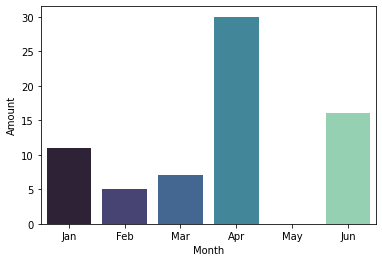

In [19]:
df_jan_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 1]
df_jan_blackpink = df_jan_blackpink[df_jan_blackpink["channel_title"] == "BLACKPINK"]
df_feb_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 2]
df_feb_blackpink = df_feb_blackpink[df_feb_blackpink["channel_title"] == "BLACKPINK"]
df_mar_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 3]
df_mar_blackpink = df_mar_blackpink[df_mar_blackpink["channel_title"] == "BLACKPINK"]
df_apr_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 4]
df_apr_blackpink = df_apr_blackpink[df_apr_blackpink["channel_title"] == "BLACKPINK"]
df_may_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 5]
df_may_blackpink = df_may_blackpink[df_may_blackpink["channel_title"] == "BLACKPINK"]
df_jun_blackpink = df_month_analyse_half_year[df_month_analyse_half_year["Month"] == 6]
df_jun_blackpink = df_jun_blackpink[df_jun_blackpink["channel_title"] == "BLACKPINK"]
data_half_year_blackpink = {"Month":["Jan","Feb","Mar","Apr","May","Jun"], "Amount":[len(df_jan_blackpink), len(df_feb_blackpink), len(df_apr_blackpink), len(df_mar_blackpink), len(df_may_blackpink), len(df_jun_blackpink)]}
df_half_year_blackpink = DataFrame(data_half_year_blackpink)
df_half_year_blackpink
sns.barplot(data = df_half_year_blackpink, x = "Month", y = "Amount", palette='mako')

(4)Dsign a parameter called ***HeatIndex*** which measures the popularity of each video by calculating ***view_count, likes, dislikes, and comment_count***. Then pick one month the see the ***HeatIndex of each video*** of the month by BLACKPINK to find the ***popularity diffrences*** in one month.

In [20]:
col_list= list(df_mar_blackpink)
df_mar_blackpink['HeatIndex'] = df_mar_blackpink[col_list].sum(axis=1, numeric_only = True)

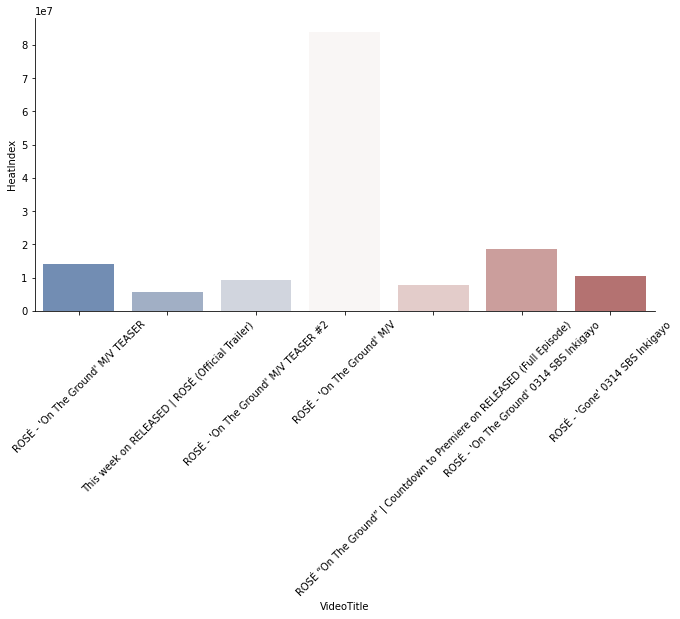

In [21]:
sns.catplot(data=df_mar_blackpink, x='video_title', y='HeatIndex',kind='bar',palette="vlag" ,ci=None, legend_out=False, aspect = 2)
plt.ylabel('HeatIndex')
plt.xlabel('VideoTitle')
plt.xticks(rotation=45)
plt.show()

## **4 Conclusion**

- **K-pop trending videos are top-rankers, but not on all levels.**
    - They **top the rankings** in terms of the number of ***views, likes and comments***; however, they are **not outstanding** in the ranking of ***trending frequency***.
    - The variables of ***views, likes and comments*** are **strongly correlated**, while the ***trending frequency*** has a **very weak correlation** with the other three indicators.


- **Only a small percentage of Kpop-related channels in the U.S. remain popular.**
    - A small number of Kpop channels such as: SMTOWN and BLACKPINK are popular in the U.S. region.
    - The polarization is serious, a small number of kpop channels are very popular, most of the videos can be on trending within four days, and other kpop channels are unattended.

- **K-pop videos uploaded amount is partly related to the month, while the HeatIndex is not**   
    - ***youtuber uploaders*** like to post videos ***in June***. ***Music uploaders*** prefer to post videos ***in May***, and ***BLACKPINK*** prefer to post videos ***in April*** in terms of data for the first half of 2021
    - The ***Heat Index*** of videos uploaded by the same uploader in the same month is ***quite different***. The gap between ***the most popular*** and ***the least popular*** can reach about ***ten times***.

## **Reference**

https://en.wikipedia.org/wiki/K-pop  

https://www.kaggle.com/yogidsba/pandas-tutorial-and-cheat-sheet